# Process Decomposition

*You are seeing the
notebook output generated by
[Literate.jl](https://github.com/fredrikekre/Literate.jl) from the
[Julia source file](https://github.com/JuliaGaussianProcesses/Stheno.jl/blob/master/examples/process_decomposition/script.jl).
The rendered HTML can be viewed [in the docs](https://juliagaussianprocesses.github.io/KernelFunctions.jl/dev/examples/process_decomposition/).*

In [1]:
using AbstractGPs
using Plots
using Random
using Stheno

Define our model.
Define a distribution over f₁, f₂, and f₃, where f₃(x) = f₁(x) + f₂(x).

In [2]:
f = @gppp let
    f1 = GP(randn(), SEKernel())
    f2 = GP(SEKernel())
    f3 = f1 + f2
end;

Randomly sample `N₁` and `N₃` locations at which to observe `f₁` and `f₃` respectively.

In [3]:
rng, N1, N3 = MersenneTwister(123546), 10, 11;
x1 = GPPPInput(:f1, sort(rand(rng, N1) * 10));
x3 = GPPPInput(:f3, sort(rand(rng, N3) * 10));
x = BlockData(x1, x3);

Generate some toy of `f1` and `f3`, `y1` and `y3` respectively.

In [4]:
fx = f(x);
y = rand(rng, f(x));
y1, y3 = split(x, y);

Compute the posterior processes.

In [5]:
f_post = posterior(fx, y);

Define some plotting stuff.

In [6]:
Np, S = 500, 25;
xp_ = range(-2.5, stop=12.5, length=Np);
xp = BlockData(GPPPInput(:f1, xp_), GPPPInput(:f2, xp_), GPPPInput(:f3, xp_));

Sample jointly from the posterior over each process.

In [7]:
f_samples = rand(rng, f_post(xp, 1e-9), S);
f′1_xp, f′2_xp, f′3_xp = split(xp, f_samples);

Compute posterior marginals.

In [8]:
ms = marginals(f_post(xp, 1e-9));
f′1_m, f′2_m, f′3_m = split(xp, mean.(ms));
f′1_s, f′2_s, f′3_s = split(xp, std.(ms));

Plot results

In [9]:
posterior_plot = plot(ylims=(-5.0, 5.0));

Plot posterior over f1.

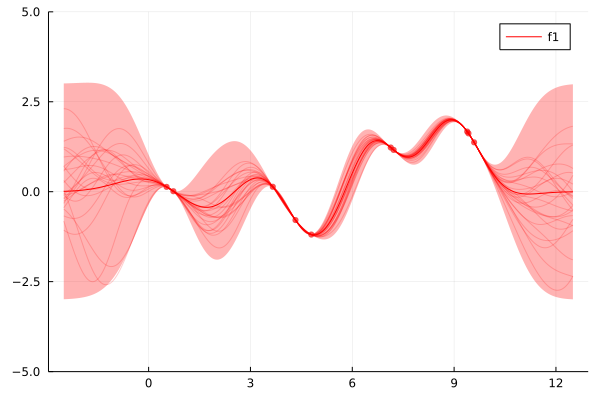

In [10]:
plot!(posterior_plot, xp_, f′1_m; ribbon=3f′1_s, color=:red, label="f1", fillalpha=0.3);
plot!(posterior_plot, xp_, f′1_xp; color=:red, label="", alpha=0.2, linewidth=1);
scatter!(posterior_plot, x1.x, y1;
    markercolor=:red,
    markershape=:circle,
    markerstrokewidth=0.0,
    markersize=4,
    markeralpha=0.7,
    label="",
)

Plot posterior over f2.

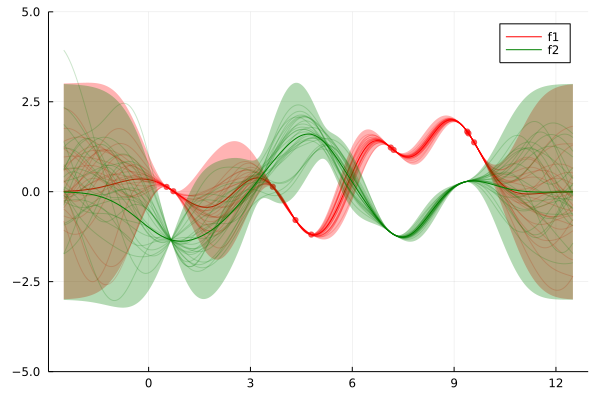

In [11]:
plot!(posterior_plot, xp_, f′2_m; ribbon=3f′2_s, color=:green, label="f2", fillalpha=0.3);
plot!(posterior_plot, xp_, f′2_xp; color=:green, label="", alpha=0.2, linewidth=1)

Plot posterior over f3

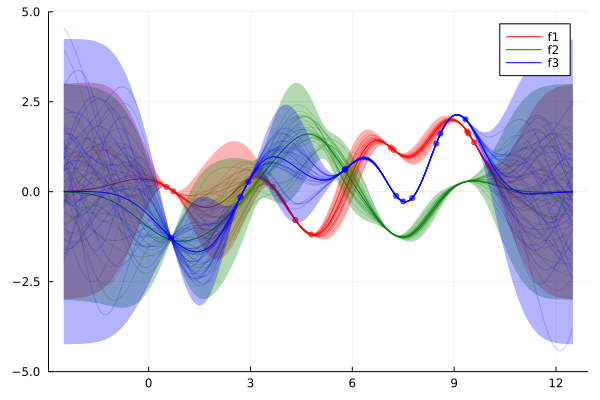

In [12]:
plot!(posterior_plot, xp_, f′3_m; ribbon=3f′3_s, color=:blue, label="f3", fillalpha=0.3);
plot!(posterior_plot, xp_, f′3_xp; color=:blue, label="", alpha=0.2, linewidth=1);
scatter!(posterior_plot, x3.x, y3;
    markercolor=:blue,
    markershape=:circle,
    markerstrokewidth=0.0,
    markersize=4,
    markeralpha=0.7,
    label="",
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*